# PA 2: Classification - Decision Tree

## Student Details
Student Name and ID : PRIYAM BANERJEE  1001529497

Citations :
http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

https://dataaspirant.com/2017/01/30/how-decision-tree-algorithm-works/

http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/

https://www.youtube.com/watch?v=tNa99PG8hR8&index=2&list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [10]:
# Load_wine dataset from sklearn
#Importing some of the following modules I'd need for my work ahead
from sklearn.datasets import load_wine  # Importing the load_wine dataset
from sklearn import tree
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools
import pandas as pd # Importing pandas to work with dataframe
import numpy as np # Importing numpy to work with scientific numerical analysis
''' Load wine dataset loading in next line'''
data = load_wine()  # Loading the load_wine over to dictionary variable called data
''' Creating pandas dataframe for the dataset '''
df = pd.DataFrame(data.data,columns=data.feature_names) # Converting the dictionary 'data' to a dataframe
y = data.target
df.head(10)    # Printing the first 10 rows of the dataframe
#features = data.feature_names
#print(features)




,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


## Printing the first and last five records of your dataset. 
## Printing the class names. 


In [11]:
print('First 5 records of dataset',df.head(5))
print('Last 5 records of the dataset \n',df.tail(5))
print("\nClass Names : ",data.target_names)  # Printing out the class names

First 5 records of dataset    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  pr

## Splitting your dataset 70% for training, and 30% for testing the classifier.

In [12]:
#Splitting dataset as 70% for training and 30% for testing 
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3) # Splitting up with testing data size as 30%
# Printing out the shapes of the Training and Test set
print("X-Train : ",X_train.shape) 
print("X-Test : ",X_test.shape)
print("Y-Train : ",y_train.shape)
print("Y-Test : ",y_test.shape)

X-Train :  (124, 13)
X-Test :  (54, 13)
Y-Train :  (124,)
Y-Test :  (54,)


### Preprocessing of dataset


Prediction accuracy for the normal test dataset with PCA
74.07%

Prediction accuracy for the standardized test dataset with PCA
98.15%


Principal Component 1 without scaling:
 [ 1.70e-03 -7.06e-04  2.43e-04 -4.12e-03  2.01e-02  1.09e-03  1.66e-03
 -1.45e-04  6.89e-04  2.61e-03  1.60e-04  7.18e-04  1.00e+00]

Principal Component 1 with scaling:
 [-0.11  0.29 -0.04  0.19 -0.17 -0.39 -0.41  0.31 -0.31  0.11 -0.32 -0.37
 -0.26]


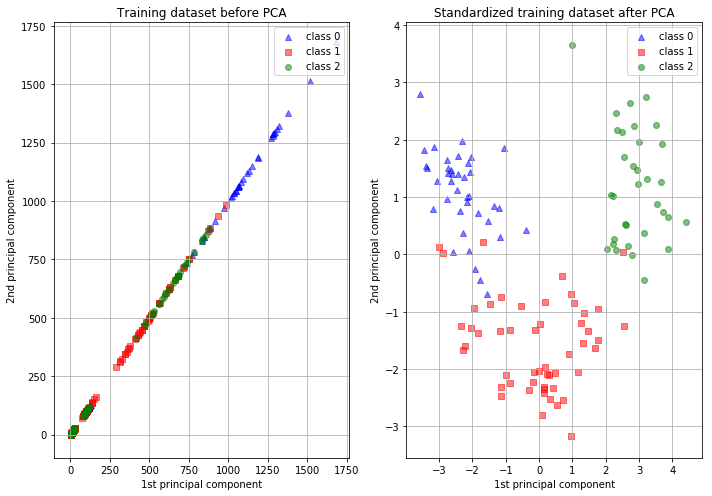

In [13]:
from __future__ import print_function
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
#print(__doc__)
RANDOM_STATE = 42
FIG_SIZE = (10, 7)

# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('Prediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Show first principal componenets
print('\nPrincipal Component 1 without scaling:\n', pca.components_[0])
print('\nPrincipal Component 1 with scaling:\n', pca_std.components_[0])

# Scale and use PCA on X_train data for visualization.
scaler = std_clf.named_steps['standardscaler']
X_train_std = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

# For...loop to plot the graph for normal PCA Dataset (Non-Standardized)
for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train == l], X_train[y_train == l],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )
# For...loop to plot the graph for Standardized PCA Dataset
for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train == l,0], X_train_std[y_train == l,1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset before PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

## Using gini and entropy to measure the quality of a split. 

In [14]:

clf_gini = DecisionTreeClassifier(criterion='gini',min_samples_split=2) # Defining decision tree classifier based on 'GINI' criterion
clf_gini.fit(X_train,y_train) # Passing training values to the classification model

print('WHILE CONSIDERING GINI INDEX/IMPURITY :')
print("ACTUAL LABEL   :  ",y_test) # Printing the actual values of the test dataset
print("PREDICTED LABEL : ",clf_gini.predict(X_test)) # Printing the classification model predicted values of the test dataset 
y_predict_gini = clf_gini.predict(X_test)

print("QUALITY OF SPLIT\nAccuracy Score (in %) considering GINI Index : ",(accuracy_score(y_test,y_predict_gini)*100))

print('----------------------------------------------------------------------------------------------------------')

clf_entropy = DecisionTreeClassifier(criterion='entropy',min_samples_split=2) # Defining decision tree classifier based on 'ENTROPY' criterion
clf_entropy.fit(X_train,y_train) # Passing training values to the classification model

print('WHILE CONSIDERING ENTROPY :')
print("ACTUAL LABEL   :  ",y_test) # Printing the actual values of the test dataset
print("PREDICTED LABEL : ",clf_entropy.predict(X_test)) # Printing the classification model predicted values of the test dataset 
y_predict_entropy = clf_entropy.predict(X_test)

print("QUALITY OF SPLIT\nAccuracy Score (in %) considering ENTROPY : ",(accuracy_score(y_test,y_predict_entropy)*100))

WHILE CONSIDERING GINI INDEX/IMPURITY :
ACTUAL LABEL   :   [1 1 0 1 2 1 1 1 0 0 0 2 0 2 2 0 0 1 0 2 2 0 1 0 0 2 0 0 2 2 0 2 1 0 1 1 1
 2 1 2 2 1 0 1 0 1 1 0 2 1 0 2 0 1]
PREDICTED LABEL :  [1 1 0 1 1 1 1 1 0 0 0 2 0 2 2 0 0 2 0 2 2 0 1 0 0 2 0 0 2 2 0 2 1 0 1 1 1
 2 1 2 1 1 0 1 0 1 1 0 2 1 0 1 0 1]
QUALITY OF SPLIT
Accuracy Score (in %) considering GINI Index :  92.5925925925926
----------------------------------------------------------------------------------------------------------
WHILE CONSIDERING ENTROPY :
ACTUAL LABEL   :   [1 1 0 1 2 1 1 1 0 0 0 2 0 2 2 0 0 1 0 2 2 0 1 0 0 2 0 0 2 2 0 2 1 0 1 1 1
 2 1 2 2 1 0 1 0 1 1 0 2 1 0 2 0 1]
PREDICTED LABEL :  [1 1 0 1 1 1 1 1 0 0 0 2 0 2 2 0 0 1 0 2 2 0 1 0 0 2 0 0 2 2 0 2 1 0 1 1 1
 2 1 2 1 1 0 1 0 1 1 0 2 1 0 1 0 1]
QUALITY OF SPLIT
Accuracy Score (in %) considering ENTROPY :  94.44444444444444


## Calculating and printing the confusion matrix

Confusion matrix without normalization
[[20  0  0]
 [ 0 18  1]
 [ 0  3 12]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.95 0.05]
 [0.   0.2  0.8 ]]


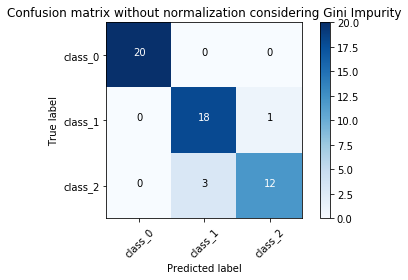

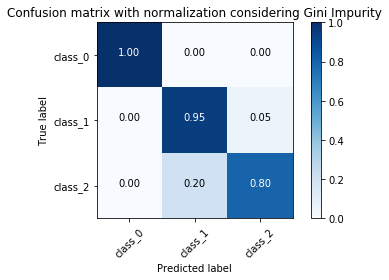

In [15]:
''' Following is the method for plotting the confusion matrix as a CMAP Plot (Matplotlib library module)'''
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # 'cm' is the computed confusion matrix being passed as parameter
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')

    print(cm) # Printing out the computed confusion matrix
    ''' DEfining parameters for plt '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    ''' Using itertools module to  '''
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Computing the confusion matrix with respect to Gini Index prediction
cnf_matrix = confusion_matrix(y_test, y_predict_gini)
np.set_printoptions(precision=2)

# Plotting the non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=data.target_names,
                      title='Confusion matrix without normalization considering Gini Impurity')

# Plotting the normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=data.target_names, normalize=True,
                      title='Confusion matrix with normalization considering Gini Impurity')

plt.show()

## The classification Report (includes: precision, recall, f1-score, and support).

In [16]:
from sklearn.metrics import classification_report
print("Classification Report for the above Confusion Matrix (Considering Gini Impurity)  :\n",classification_report(y_test,y_predict_gini))


Classification Report for the above Confusion Matrix (Considering Gini Impurity)  :
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        20
          1       0.86      0.95      0.90        19
          2       0.92      0.80      0.86        15

avg / total       0.93      0.93      0.93        54



## Visualization of the Decision Tree using Gini Impurity

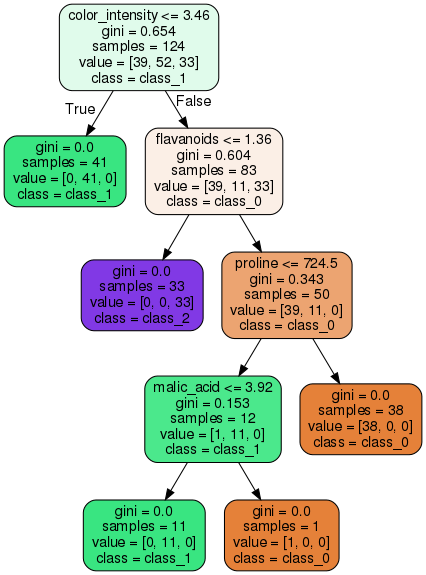

In [17]:
''' Drawing the decision tree based on Gini Index/Impurity calculation '''
from IPython.display import Image
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz # Graphviz is the module for plotting the decision tree
from subprocess import call # For using call as a system call
%matplotlib inline
dot_data = StringIO() 
''' In method call below using .dot for dot product of arrays'''
export_graphviz(clf_gini,
                    out_file='dot_data.dot',
                    feature_names=data.feature_names,
                    class_names=data.target_names,
                    filled=True,
                    rounded=True,
                    impurity=True
                    )
# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'dot_data.dot', '-o', 'decisiontree_usingGini.png', '-Gdpi=75']) # system call to convert .dot file to .png file
Image(filename = 'decisiontree_usingGini.png') # Displaying the Image file. Uses IPython.display.Image module


## Visualization of the Decision Tree using Entropy

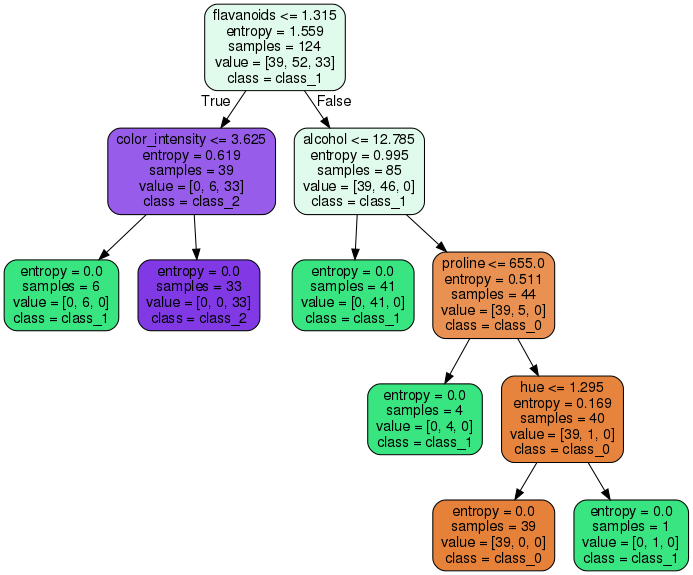

In [18]:
''' Drawing the decision tree based on Gini Index/Impurity calculation '''
from IPython.display import Image
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz # Graphviz is the module for plotting the decision tree
from subprocess import call # For using call as a system call
%matplotlib inline
dot_data = StringIO() 
''' In method call below using .dot for dot product of arrays'''
export_graphviz(clf_entropy,    # Drawing decision tree Using clf_entropy
                    out_file='dot_data.dot',
                    feature_names=data.feature_names,
                    class_names=data.target_names,
                    filled=True,
                    rounded=True,
                    impurity=True
                    )
# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'dot_data.dot', '-o', 'decisiontree_usingentropy.png', '-Gdpi=75']) # system call to convert .dot file to .png file
Image(filename = 'decisiontree_usingentropy.png') # Displaying the Image file. Uses IPython.display.Image module